In [1]:
!nvidia-smi

Sat Jun 14 05:37:40 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   48C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!pip install ultralytics

In [4]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.154 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.8/112.6 GB disk)


In [5]:
from ultralytics import YOLO

from IPython.display import display, Image

train the custom data

In [10]:
%cd /content/drive/MyDrive/Colab Notebooks/YOLOv8

/content/drive/MyDrive/Colab Notebooks/YOLOv8


In [11]:
!ls

 data   Yolov8.ipynb  'YOLOv8 Object Detection on Custom dataset.ipynb'


In [12]:
%cd /content/drive/MyDrive/Colab Notebooks/YOLOv8

!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=25 imgsz=224 plots=True

/content/drive/MyDrive/Colab Notebooks/YOLOv8
100% 21.5M/21.5M [00:00<00:00, 186MB/s]
Ultralytics 8.3.154 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=25, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=Tru

In [13]:
!ls runs/detect/train/

args.yaml			 labels.jpg    results.png	   train_batch1.jpg
confusion_matrix_normalized.png  P_curve.png   train_batch0.jpg    train_batch2.jpg
confusion_matrix.png		 PR_curve.png  train_batch120.jpg  val_batch0_labels.jpg
F1_curve.png			 R_curve.png   train_batch121.jpg  val_batch0_pred.jpg
labels_correlogram.jpg		 results.csv   train_batch122.jpg  weights


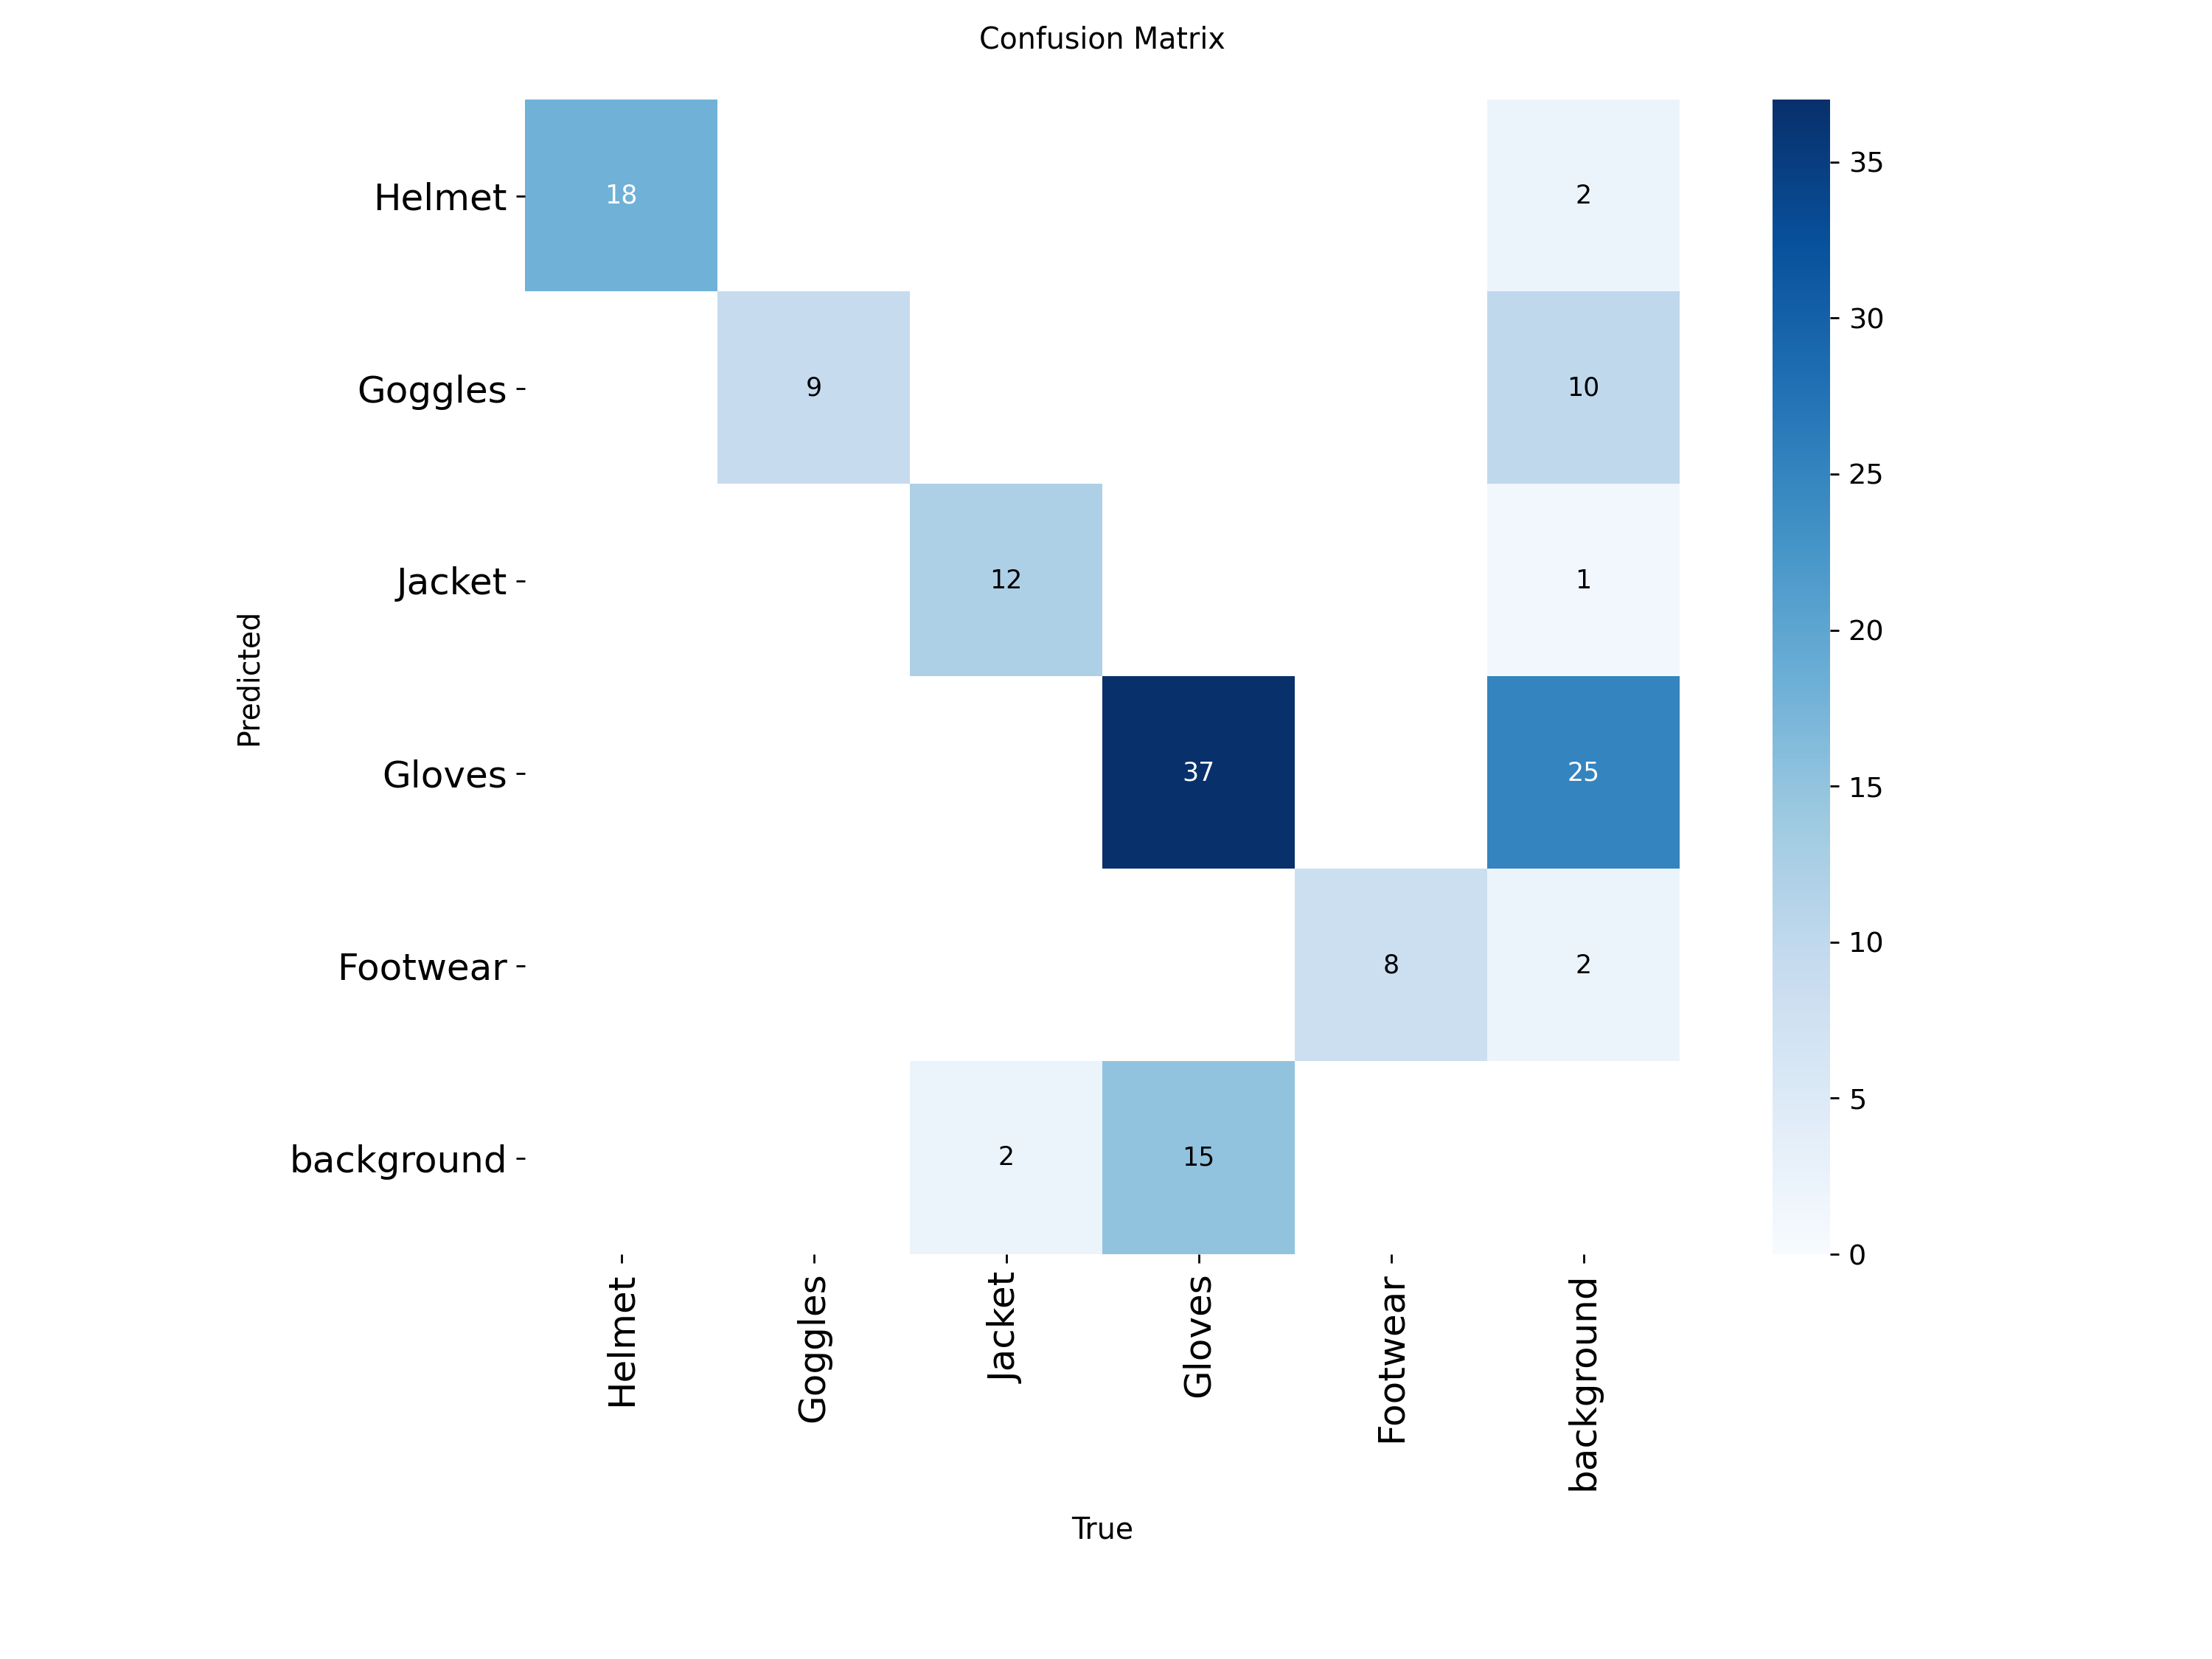

In [14]:
Image(filename='runs/detect/train/confusion_matrix.png', width=600)

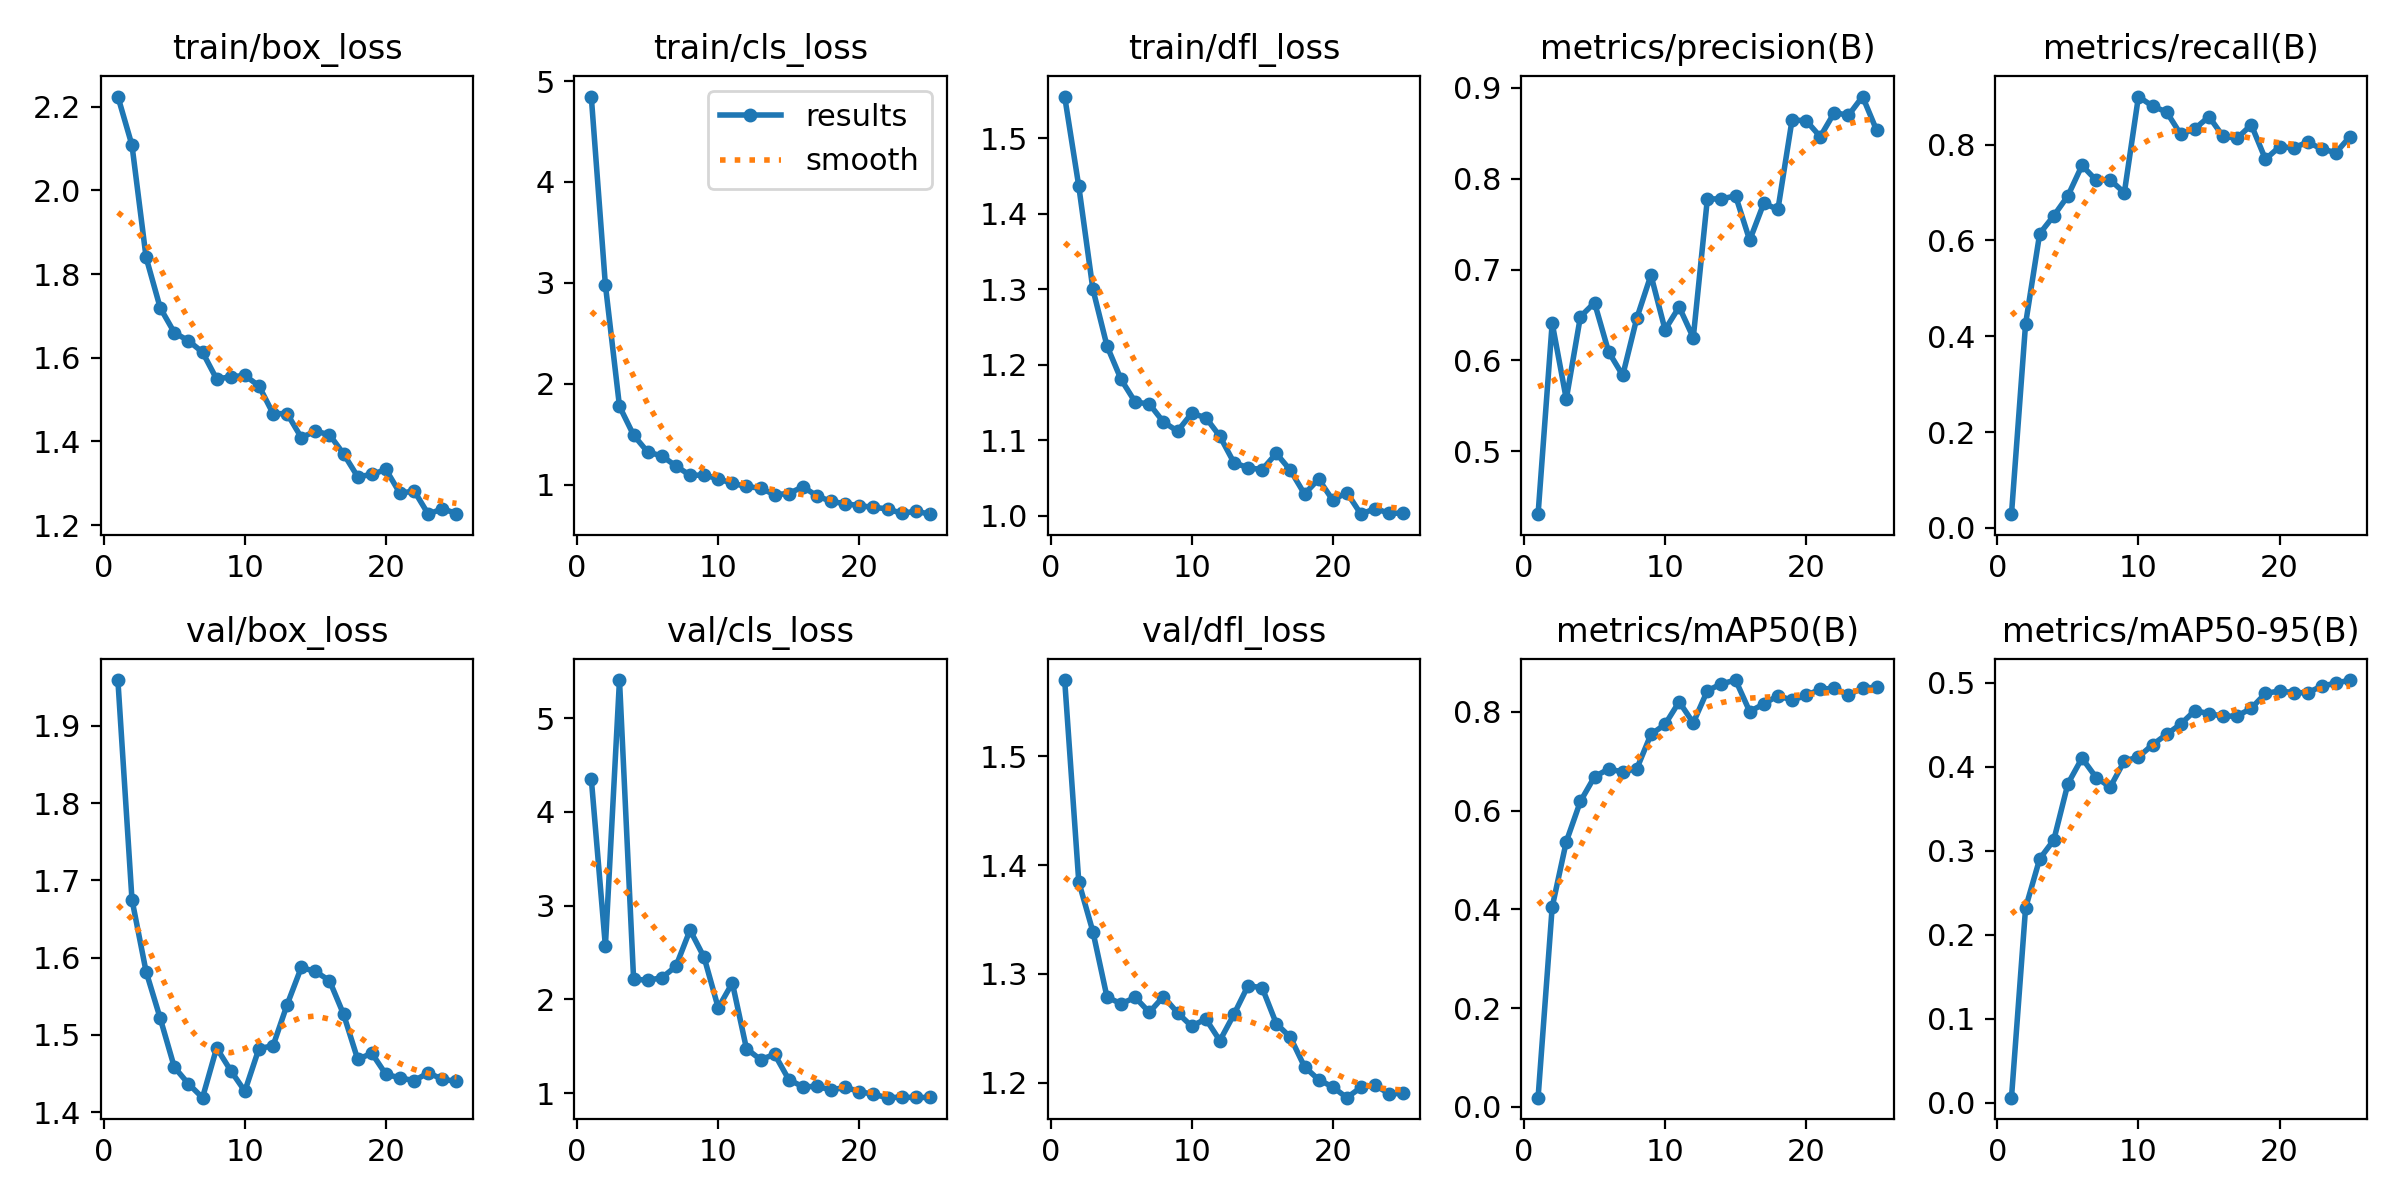

In [15]:
Image(filename='runs/detect/train/results.png', width=600)

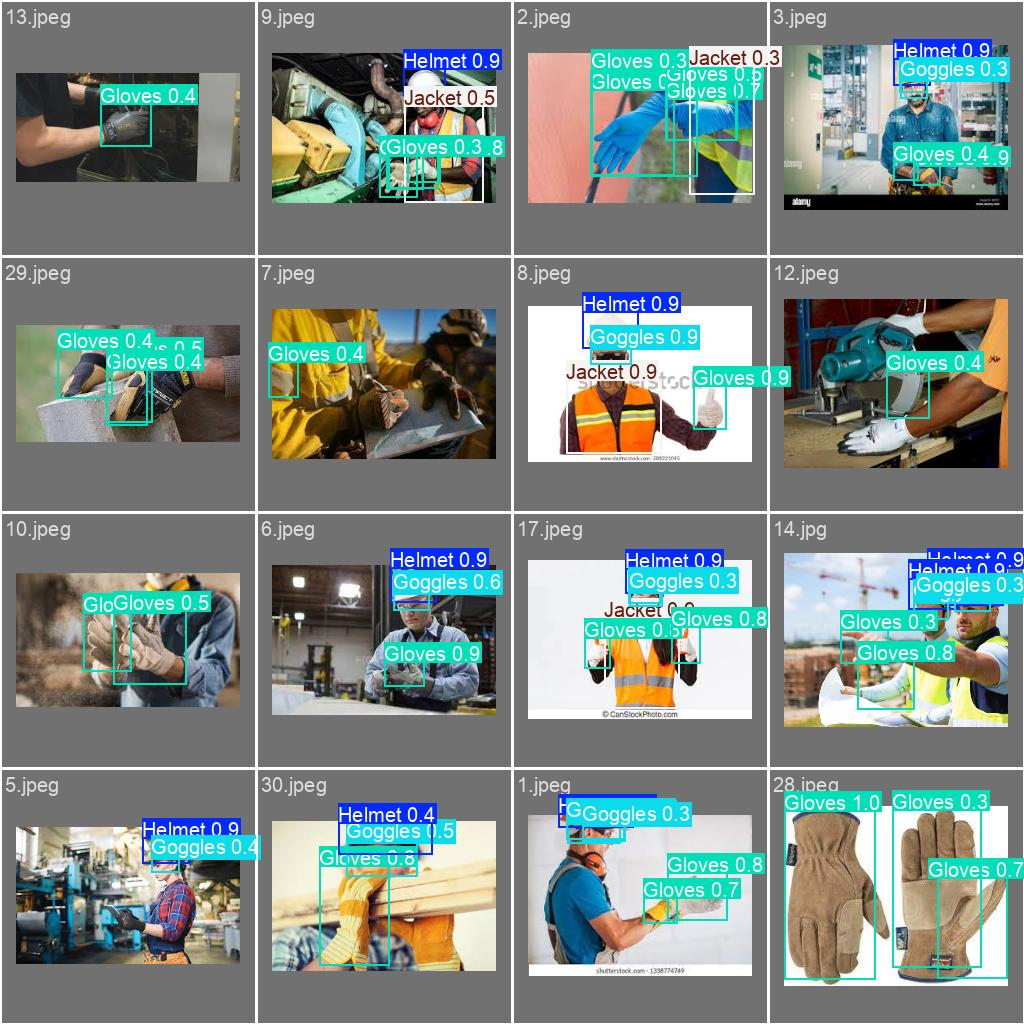

In [16]:
Image(filename='runs/detect/train/val_batch0_pred.jpg', width=600)

validate custom data

In [17]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=data.yaml

Ultralytics 8.3.154 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.5±0.2 ms, read: 19.4±32.2 MB/s, size: 48.8 KB)
val: Scanning /content/drive/MyDrive/Colab Notebooks/YOLOv8/data/valid/labels.cache... 31 images, 0 backgrounds, 0 corrupt: 100% 31/31 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:00<00:00,  3.14it/s]
                   all         31        101      0.883      0.787      0.851      0.499
                Helmet         17         18       0.96          1      0.995      0.677
               Goggles          9          9      0.724      0.556      0.645       0.35
                Jacket         13         14          1      0.841      0.905      0.647
                Gloves         30         52      0.751      0.538      0.716      0.394
              Footwear          4

Prediction on custom data

In [19]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source=data/test/images

Ultralytics 8.3.154 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs

image 1/47 /content/drive/MyDrive/Colab Notebooks/YOLOv8/data/test/images/1 (1).jpeg: 192x224 2 Goggless, 2 Glovess, 74.6ms
image 2/47 /content/drive/MyDrive/Colab Notebooks/YOLOv8/data/test/images/1.jpeg: 192x224 2 Goggless, 2 Glovess, 35.9ms
image 3/47 /content/drive/MyDrive/Colab Notebooks/YOLOv8/data/test/images/10 (1).jpeg: 160x224 4 Glovess, 147.3ms
image 4/47 /content/drive/MyDrive/Colab Notebooks/YOLOv8/data/test/images/10.jpeg: 160x224 4 Glovess, 14.6ms
image 5/47 /content/drive/MyDrive/Colab Notebooks/YOLOv8/data/test/images/11 (1).jpeg: 224x224 3 Glovess, 36.7ms
image 6/47 /content/drive/MyDrive/Colab Notebooks/YOLOv8/data/test/images/11.jpeg: 224x224 3 Glovess, 25.5ms
image 7/47 /content/drive/MyDrive/Colab Notebooks/YOLOv8/data/test/images/12 (1).jpeg: 192x224 1 Gloves, 18.4ms
image 8/47 /content/drive/MyDrive

Lets take a look at result

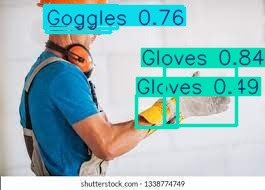

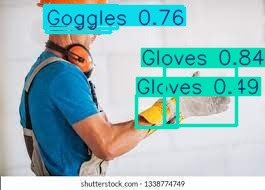

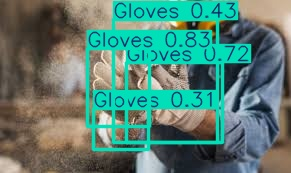

In [20]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/detect/predict/*.jpg')[:3]:
  display(Image(filename=image_path, width=600))
  print("\n")